In [1]:
import requests
import re
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in Data

In [2]:
movie = pd.read_csv("../Data/IMDb_Movies.csv")

In [3]:
score = pd.read_csv("../Data/IMDb_Score.csv")

In [4]:
rt = pd.read_csv("../Data/Rotten_Tomatoes.csv")

### Movie and RT combined

In [5]:
m_rt = movie.merge(rt, how = 'outer', on = 'Title_ID')
m_rt.head()

,Title_ID,Title,Director,Rating,Genre,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,Tomatometer,RT_Audience_Score,RT_Critic_Reviews,RT_Audience_Reviews,US_Box_Office,Distributor,Original_Language,RT_All_Pct
0,17761,The Shawshank Redemption,Frank Darabont,R,Drama,142,1994,43,21,7041,91,98,82,250k+,$27.3M,Columbia Pictures,English,94.5
1,17762,The Godfather,Francis Ford Coppola,R,"Crime, Drama",175,1972,30,32,7042,97,98,149,250k+,$134.8M,Paramount Pictures,English,97.5
2,17763,The Dark Knight,Christopher Nolan,PG-13,"Action, Crime, Drama",152,2008,163,160,7043,94,94,345,250k+,$2.0M,Warner Bros.,English,94.0
3,17764,The Godfather Part II,Francis Ford Coppola,R,"Crime, Drama",202,1974,21,17,7044,96,97,123,250k+,Not Available,Paramount Pictures,English,96.5
4,17765,12 Angry Men,Sidney Lumet,Approved,"Crime, Drama",96,1957,13,17,7045,100,97,58,100k+,Not Available,"Criterion Collection, MGM/UA Home Entertainmen...",English,98.5


### Movie and Score Combined

In [6]:
m_s = movie.merge(score, how = 'outer', on = 'Score_ID')
m_s.head()

,Title_ID,Title,Director,Rating,Genre,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,IMDb_Score,Audience_Reviews,US_Users,Non_US_Users,Male_Reviews,Female_Reviews,Male_Score,Female_Score,IMDb_Score_Pct
0,17761,The Shawshank Redemption,Frank Darabont,R,Drama,142,1994,43,21,7041,9.3,2666904,566032,1672983,1475251,294889,9.3,9.2,93
1,17762,The Godfather,Francis Ford Coppola,R,"Crime, Drama",175,1972,30,32,7042,9.2,1848055,417566,1161734,1072921,166441,9.2,8.9,92
2,17763,The Dark Knight,Christopher Nolan,PG-13,"Action, Crime, Drama",152,2008,163,160,7043,9.0,2639814,621027,1646769,1490958,267216,9.0,8.7,90
3,17764,The Godfather Part II,Francis Ford Coppola,R,"Crime, Drama",202,1974,21,17,7044,9.0,1265636,282291,805848,759883,105690,9.0,8.7,90
4,17765,12 Angry Men,Sidney Lumet,Approved,"Crime, Drama",96,1957,13,17,7045,9.0,787589,187528,509017,453568,76860,9.0,8.9,90


### Movie, Score, and RT in One DataFrame

In [7]:
all_df = m_rt.merge(score, how = "left", on = "Score_ID")
all_df.head()

,Title_ID,Title,Director,Rating,Genre,Runtime,Release_Year,Award_Noms,Award_Wins,Score_ID,...,RT_All_Pct,IMDb_Score,Audience_Reviews,US_Users,Non_US_Users,Male_Reviews,Female_Reviews,Male_Score,Female_Score,IMDb_Score_Pct
0,17761,The Shawshank Redemption,Frank Darabont,R,Drama,142,1994,43,21,7041,...,94.5,9.3,2666904,566032,1672983,1475251,294889,9.3,9.2,93
1,17762,The Godfather,Francis Ford Coppola,R,"Crime, Drama",175,1972,30,32,7042,...,97.5,9.2,1848055,417566,1161734,1072921,166441,9.2,8.9,92
2,17763,The Dark Knight,Christopher Nolan,PG-13,"Action, Crime, Drama",152,2008,163,160,7043,...,94.0,9.0,2639814,621027,1646769,1490958,267216,9.0,8.7,90
3,17764,The Godfather Part II,Francis Ford Coppola,R,"Crime, Drama",202,1974,21,17,7044,...,96.5,9.0,1265636,282291,805848,759883,105690,9.0,8.7,90
4,17765,12 Angry Men,Sidney Lumet,Approved,"Crime, Drama",96,1957,13,17,7045,...,98.5,9.0,787589,187528,509017,453568,76860,9.0,8.9,90


# How do the Top 250 Movies by IMDb compare to Rotten Tomatoes?

## Question 1: What is the average rating by genre for both IMDb and Rotten Tomatoes?

## Question 2: Which movies won the most awards?

In [8]:
movie_award = all_df[['Title','RT_All_Pct','IMDb_Score_Pct','Award_Noms', 'Award_Wins']].nlargest(10, 'Award_Wins')
movie_award

,Title,RT_All_Pct,IMDb_Score_Pct,Award_Noms,Award_Wins
33,Parasite,94.5,85,271,308
199,Mad Max: Fury Road,91.5,81,234,247
179,12 Years a Slave,92.5,81,337,242
6,The Lord of the Rings: The Return of the King,89.5,90,124,209
151,No Country for Old Men,89.5,82,140,164
2,The Dark Knight,94.0,90,163,160
13,Inception,89.0,88,220,158
186,The Grand Budapest Hotel,89.0,81,227,136
122,1917,88.5,82,206,135
72,Inglourious Basterds,88.5,83,172,134


ANSWER: <br>
1. Parasite <br>
2. Mad Max: Fury Road <br>
3. 12 Years a Slave <br>
4. LOTR: The Return of the King <br>
5. No Country for Old Men <br>
6. The Dark Knight <br>
7. Inception <br>
8. The Grand Budapest Hotel <br>
9. 1917 <br>
10. Inglourious Basterds <br>

## Did they receive a high rating on IMDb? What about Rotten Tomatoes?

IMDb: LOTR, Dark Knight, and Inception rated higher on IMDb over the Parasite <br>
RT_Aud: 12 Years a Slave received the same rating as Parasite, but Dark Knight and Inception have a higher rating <br>
RT_Crit: Parasite was the fan favorite of critics

### <font color='royalblue'> Visual (Question 2) </font>

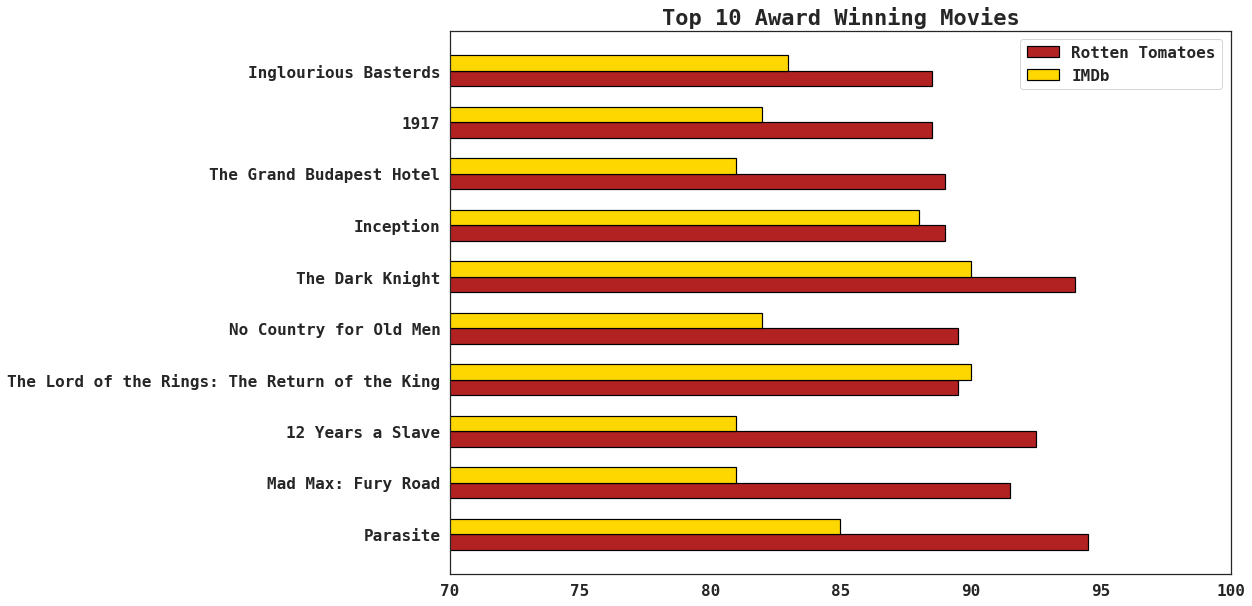

In [116]:
# set the font globally
plt.rcParams.update({'font.family':'monospace'})

# Create the y value and bar width 
y = np.arange(len(movie_award['Title']))
width = 0.30

# Define plot size
plt.rcParams['figure.figsize'] = [14, 10]

# Plot the x and y values
fig,ax = plt.subplots()
bar1 = ax.barh(y-width/2, movie_award['RT_All_Pct'], width, label = "Rotten Tomatoes", color = 'firebrick', edgecolor = 'black', linewidth = 1.2)
bar2 = ax.barh(y+width/2, movie_award['IMDb_Score_Pct'], width, label = "IMDb", color = 'gold', edgecolor = 'black', linewidth = 1.2)
 
# Set the y labels and legends
ax.set_yticks(y)
ax.set_yticklabels(movie_award['Title'], weight = 'bold', size = '16')
ax.legend

# Set the x labels
ax.set_xlim(70, 100)
ax.set_xticks([70,75,80,85,90,95,100])
ax.set_xticklabels(['70','75','80','85','90','95','100'], weight = 'bold', size = '16')

#title 
ax.set_title('Top 10 Award Winning Movies', weight = 'bold', size = '22')

#Clustered Bar legend
plt.legend(["Rotten Tomatoes", "IMDb"], ncol=1, loc="upper left", bbox_to_anchor= (.72,1), fontsize = '16');

## Question 3: On which site do more people tend to leave more reviews?

In [ ]:
movie.groupby(['Title','Director','Rating

# Further Analysis

## Question 4: What is the most prevalent genre?

## Question 5: What is the average length of the movies?

#### The longest movie?

#### The shortest movie?

## Question 6: What is the average movie rating?

## Question 7: What percentage of movies were "approved" with the Hayes Coded compared to newer movies with the MPAA modern rating system?

## Question 8: What is the range of years of the movies in the Top 250 List?

#### Are there outliers?

#### What decade were most films released in?

## Question 9: Which directors appear more than once?

## Question 10: What is the average difference between critics' scores and audiences' scores on Rotten Tomotatoes?

## Question 11: How do US-reviewers compare to non-US reviewers on IMDb?

#### Who tends to write more reviews?

#### What is the average scores between the two?

#### What genre interests US-reviewers more? What about non-US reviewers?

NOTE: important to note that the term US and non-US is based on the country the reviewer left the review...does not necessarily indicate that reviewers' citizenship

## Question 12: How many movies are a part of the same cinematic "universe"?

## Question 13: Do the movies on the Top 250 List tend to be nominated for several awards (i.e., more than 5)?

## Question 14: Which distributor has been a part of the most movies in the Top 250 Movie List?

# Potential Code for genres later on

code for font colors

In [ ]:
### <font color='royalblue'> Visual (Question 2) </font>

testers for genres

In [ ]:
def condition(x):
    return x.contains('crime')

In [ ]:
from collections import Counter

In [ ]:
lst = ['crime','adventure, crime, fanstasy', 'drama', 'thriller, crime', 'crime, action', 'drama, fanstasy']

# for x in lst:
#     counts = Counter(re.findall(r'\S*\W*crime\W*\S*',lst[]))
# counts

In [ ]:
lst1 = {'genre' : ['crime','adventure, crime, fanstasy', 'drama', 'thriller, crime', 'crime, action', 'drama, fanstasy'],
       'movie' : ['harry potter', 'lord of the rings', 'percy jackson', 'hobbit', 'game of thrones', 'house']}

# counts = Counter(lst)
# count_crime2 = counts[r'\S*\W*crime\W*\S*']

In [ ]:
lst_df = pd.DataFrame(lst1)
lst_df

In [ ]:
print(lst_df['genre'].splitlines())

In [ ]:
print(lst_df)

In [ ]:
lst_df[lst_df['genre'].str.contains('crime', na=False)]

In [ ]:
# #importing necessary tools
# from functools import reduce

# #defining a list of DataFrames
# dfs = [movie, score, rt]

# #merge all DataFrames into one
# final_df = reduce(lambda  left,right: pd.merge(left,right,on=['column_name'],how='outer'), dfs)